In [126]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import regex as re

,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
0,1990.0,3297,2847,450,57,6,387,2274,2004.0,142,...,418,524,608,1105.421,67.300,0.219444,7.4,-2.669133,-5108,manitoba
1,1991.0,1950,1589,361,14,0,347,1438,1085.0,143,...,424,531,630,1109.604,67.025,-1.364064,8.6,-2.669133,-5108,manitoba
2,1992.0,2310,1683,627,64,10,553,1821,1383.0,170,...,434,545,644,1112.689,66.475,-1.351685,9.3,-0.326989,-5108,manitoba
3,1993.0,2425,1874,551,52,83,416,1702,1338.0,151,...,435,550,652,1117.618,66.850,0.766782,9.3,-0.453243,-2520,manitoba
4,1994.0,3197,2441,756,72,410,274,1664,1289.0,79,...,440,551,645,1123.230,66.750,0.774181,8.8,0.161821,-1996,manitoba


In [128]:
housing_df.shape

(944, 37)

In [129]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               944 non-null    float64
 1   total_dwelling                     944 non-null    int64  
 2   single_detached                    944 non-null    int64  
 3   multiple                           944 non-null    int64  
 4   semi_detached                      944 non-null    int64  
 5   row                                944 non-null    int64  
 6   apartment                          944 non-null    int64  
 7   total_dwelling_market              944 non-null    int64  
 8   homeownership_freehold             943 non-null    float64
 9   rental                             944 non-null    int64  
 10  homeownership_condo                944 non-null    int64  
 11  other                              944 non-null    int64  

In [130]:
def percentage_missing(df):
    no_of_missing_values = df.isnull().sum()
    percent_of_missing_values = no_of_missing_values/df.shape[0] * 100

    table = pd.DataFrame(percent_of_missing_values , columns=['percentage of missing values'] )   # Create dataframe with percentage of missing values

    return table[table.any(axis=1)]

missing_columns = housing_df.columns[housing_df.isnull().any()]

In [131]:
percentage_missing(housing_df)

,percentage of missing values
homeownership_freehold,0.105932
vacancy_rate_condo,42.796610
HPI_change,25.635593
CPI_change,34.216102
owned_accommodation_costs_change,39.936441
rental_accommodation_costs_change,39.936441
disposable_income_change,77.118644


In [133]:
# Imputing missing values by interpolating according to year

housing_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace = True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               944 non-null    float64
 1   total_dwelling                     944 non-null    int64  
 2   single_detached                    944 non-null    int64  
 3   multiple                           944 non-null    int64  
 4   semi_detached                      944 non-null    int64  
 5   row                                944 non-null    int64  
 6   apartment                          944 non-null    int64  
 7   total_dwelling_market              944 non-null    int64  
 8   homeownership_freehold             944 non-null    float64
 9   rental                             944 non-null    int64  
 10  homeownership_condo                944 non-null    int64  
 11  other                              944 non-null    int64  

### Analysis on Supply and Demand

In [134]:
# seperate dataframe for construction details

constn_df = housing_df.drop(housing_df.columns[24: -1], axis=1)
constn_df.columns

Index(['year', 'total_dwelling', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'total_dwelling_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'completed', 'res_building_permit', 'res_building_permit_amount',
       'completed_but_unabsorbed_homes', 'new_single_and_semi_detached',
       'new_rows_and_apartment', 'rental_vacancy_rate',
       'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'region'],
      dtype='object')

In [135]:
constn_df.rename(columns={'total_dwelling' :'total_constn_start', 
                          'total_dwelling_market' : 'contn_start_int_market',
                          'completed' : 'total_constn_complete', 
                         }, inplace = True)

In [136]:
constn_df.columns

Index(['year', 'total_constn_start', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'contn_start_int_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'total_constn_complete', 'res_building_permit',
       'res_building_permit_amount', 'completed_but_unabsorbed_homes',
       'new_single_and_semi_detached', 'new_rows_and_apartment',
       'rental_vacancy_rate', 'rental_avilability_rate',
       'vacancy_rate_seniors', 'vacancy_rate_condo', 'HPI_change',
       'CPI_change', 'region'],
      dtype='object')

In [137]:
fig = px.line(constn_df, x="year", y="total_constn_start", color = 'region', title='Constructions started year by year')
fig.show()

The above chart shows that Ontario has highest number of constructions.

In 1995, there was a considerable dip in new constructions. Then it increased and reached the peak in 2003.In 2009 there is little drop. Till 2016 the construction are steadily increasing.

We can see the same trend in other provinces as well(Quebec, Alberta)

In [138]:
provinces = ['alberta', 'ontario', 'quebec','prince_edward', 'manitoba','new_brunswick', 'saskatchewan', 'nova_scotia' ]

# plotting bar chart for the provinces alone
fig = px.bar(constn_df[constn_df['region'].isin(provinces)], x="year", y = "total_constn_start", color = 'region',
             barmode='group',height=500, title='Constructions started year by year for Canadian Provinces')
fig.show()

The figure above shows Ontario, Quebec and Alberta high construction rate compared to other provinces.

The housing crisis in USA was in 2008, In 2009, number constructions decreased but again picked up in next year.

In 1990, Ontario and Quebec had significatly higher number of constructions but after 2003, the numbers increased almost similar to Quebec

### More detailed comparion for Constructions Started vs Completed Vs Unabsorbed by year Vs Residential Permit for Census Metropolitan Areas - Canada

In [139]:
# set with all the region in ascending order
regions = sorted(set(housing_df["region"]))

# Initialize figure, plots , buttons and default region to be displayed
fig1=go.Figure()
region_plot_names = []
buttons=[]
default_region = regions[0]

for region_name in regions:
    reg_df = constn_df[constn_df['region']== region_name]
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.total_constn_complete,  
                        mode='lines + markers', name='Construction Completed',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.completed_but_unabsorbed_homes,
                            mode='lines+markers', name='Units unabsorbed',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.res_building_permit,  
                        mode='lines+markers', name='residential building Permit',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.total_constn_start,
                            mode='lines+markers', name='Construction Started',
                            visible=(region_name==default_region)))
    
    region_plot_names.extend([region_name]*4)
    
for region_name in regions:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))
    
# Add dropdown menus to the figure
fig1.update_layout(title = "Construction Started vs Completed Vs Unabsorbed by year Vs Residential Permit for  Census Metropolitan Areas - Canada",
                  yaxis_title = "number of dwelling units",
                  xaxis_title = "Year",
                  showlegend=True, 
                  updatemenus=[{"buttons": buttons, 
                                "direction": "down", 
                                "active": regions.index(default_region), 
                                "showactive": True, 
                                
                                "x": 0.5, 
                                "y": 1.15}
                              ])
fig1.show()

- Unabsorbed homes are consistently low compared to annual new home construction and residential building permits, indicating high demand.
  
- Significant drops in construction occurred in all regions in 1995 and 2008.
  
    - The 1990-1992 recession affected much of the Western world, with Canada impacted more than the US.
  
    - The 2008 US housing crisis had less influence in Canada, with construction picking up from 2010.
      - The number of constructions started, completed, and building permits issued have remained in a similar range.
      - Unabsorbed homes (completed but unsold) are fewer compared to total completed units, indicating very low inventory and high demand.

### Population growth vs Construction growth

In [140]:
housing_df.columns

Index(['year', 'total_dwelling', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'total_dwelling_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'completed', 'res_building_permit', 'res_building_permit_amount',
       'completed_but_unabsorbed_homes', 'new_single_and_semi_detached',
       'new_rows_and_apartment', 'rental_vacancy_rate',
       'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'owned_accommodation_costs_change',
       'rental_accommodation_costs_change', 'bachelor', 'one_bedroom',
       'two_bedroom', 'three_bedroom', 'population',
       'labour_participation_rate', 'employment_change', 'unemployment_rate',
       'disposable_income_change', 'migration', 'region'],
      dtype='object')

In [141]:
rate_df= housing_df[ ['year','completed', 'rental_vacancy_rate', 'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'owned_accommodation_costs_change','rental_accommodation_costs_change', 'migration','population', 'region'] ]

In [142]:
rate_change_df = rate_df.copy()
#completed_percent = rate_change_df.loc[:, ('completed')].pct_change()
#df = df.sort_values(['Item', 'Year']).reset_index(drop=True)
rate_change_df.sort_values('year').reset_index(drop=True)
construction_percent = rate_change_df.groupby('region', sort=False)['completed'].apply(
                                    lambda x: x.pct_change())
popn_percent = rate_change_df.groupby('region', sort=False)['population'].apply(
                                    lambda x: x.pct_change())
migration_percent = rate_change_df.groupby('region', sort=False)['migration'].apply(
                                    lambda x: x.pct_change())
#new_percent = (rate_change_df.groupby('region')['completed'].apply(pd.Series.pct_change) )

C:\Users\jahir\AppData\Local\Temp\ipykernel_30840\4001593512.py:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

C:\Users\jahir\AppData\Local\Temp\ipykernel_30840\4001593512.py:7: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

C:\Users\jahir\AppData\Local\Temp\ipykernel_30840\4001593512.py:9: Fut

In [143]:
rate_change_df.loc[:,'construction_compn_rate'] = construction_percent 
rate_change_df.loc[:,'popn_rate'] = popn_percent 
rate_change_df.loc[:,'migration_rate'] = migration_percent 
# rate_change_df.loc[:,'new_construction_compn_rate'] = new_percent 
#.to_numpy()

In [144]:
rate_change_df[rate_change_df['region'] == 'ontario']

,year,completed,rental_vacancy_rate,rental_avilability_rate,vacancy_rate_seniors,vacancy_rate_condo,HPI_change,CPI_change,owned_accommodation_costs_change,rental_accommodation_costs_change,migration,population,region,construction_compn_rate,popn_rate,migration_rate
836,1990.0,80562,1.4,5.7,13.3,-1.329857,4.815267,1.483051,6.632902,3.985029,74516,10295.832,ontario,NaN,NaN,NaN
837,1991.0,59622,2.2,5.7,13.3,-10.702960,4.636393,1.483051,2.109974,3.419437,74516,10431.316,ontario,-0.259924,0.013159,0.000000
838,1992.0,63134,2.6,5.7,13.3,-3.211009,1.021750,1.483051,-0.429377,2.917392,74516,10572.205,ontario,0.058904,0.013506,0.000000
839,1993.0,51130,2.7,5.7,13.3,-1.712276,1.782495,1.483051,-0.835504,2.586035,55780,10690.038,ontario,-0.190135,0.011146,-0.251436
840,1994.0,49106,2.4,5.7,13.3,-0.279981,0.049193,1.483051,-1.386121,2.094241,71311,10819.146,ontario,-0.039585,0.012077,0.278433
841,1995.0,36278,2.3,5.7,13.3,-0.015598,2.468286,1.483051,1.460726,1.737892,73939,10950.119,ontario,-0.261231,0.012106,0.036853
842,1996.0,40729,3.0,5.7,13.3,-1.014041,1.516315,1.483051,-0.833032,1.437506,78225,11082.903,ontario,0.122691,0.012126,0.057967
843,1997.0,51297,2.8,5.7,13.3,2.080378,1.881263,1.483051,-0.776114,1.490752,91092,11227.651,ontario,0.259471,0.013060,0.164487
844,1998.0,48403,2.6,5.7,13.3,2.501158,0.927902,1.483051,0.395693,1.260314,87411,11365.901,ontario,-0.056417,0.012313,-0.040410
845,1999.0,59835,2.1,5.7,13.3,1.656876,1.939873,1.798961,1.420715,1.280444,90589,11504.759,ontario,0.236184,0.012217,0.036357


In [145]:
# set with all the region in ascending order
regions = sorted(set(rate_change_df["region"]))

# Initialize figure, plots , buttons and default region to be displayed
fig1=go.Figure()
region_plot_names = []
buttons=[]
default_region = regions[0]

for region_name in regions:
    reg_df = rate_change_df[rate_change_df['region']== region_name]
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.construction_compn_rate,  
                        mode='lines + markers', name='Rate of Construction Completed',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.popn_rate,
                            mode='lines+markers', name='Population growth rate',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.migration_rate,  
                        mode='lines+markers', name='Immigration rate',
                            visible=(region_name==default_region)))
    
#     fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.HPI_change,
#                             mode='lines+markers', name='HPI rate',
#                             visible=(region_name==default_region)))
    
    region_plot_names.extend([region_name]*3)
    
for region_name in regions:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))
    
# Add dropdown menus to the figure
fig1.update_layout(title = "Pecentage of Construction, Population and Immigration  for  Census Metropolitan Areas - Canada",
                  yaxis_title = "Percentage change",
                  xaxis_title = "Year",
                  showlegend=True, 
                  updatemenus=[{"buttons": buttons, 
                                "direction": "down", 
                                "active": regions.index(default_region), 
                                "showactive": True, 
                                
                                "x": 0.5, 
                                "y": 1.15}
                              ])
fig1.show()

### Population vs total construction

In [146]:
# set with all the region in ascending order
regions = sorted(set(housing_df["region"]))

# Initialize figure, plots , buttons and default region to be displayed
fig1=go.Figure()
region_plot_names = []
buttons=[]
default_region = regions[0]

for region_name in regions:
    reg_df = rate_change_df[housing_df['region']== region_name]
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.population*1000,  
                        mode='lines + markers', name='Population ',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.migration,
                            mode='lines+markers', name='Migration',
                            visible=(region_name==default_region)))
    
#     fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.migration_rate,  
#                         mode='lines+markers', name='Immigration rate',
#                             visible=(region_name==default_region)))
    
#     fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.HPI_change,
#                             mode='lines+markers', name='HPI rate',
#                             visible=(region_name==default_region)))
    
    region_plot_names.extend([region_name]*2)
    
for region_name in regions:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))
    
# Add dropdown menus to the figure
fig1.update_layout(title = "Construction Vs Population for  Census Metropolitan Areas - Canada",
                  yaxis_title = "Count",
                  xaxis_title = "Year",
                  showlegend=True, 
                  updatemenus=[{"buttons": buttons, 
                                "direction": "down", 
                                "active": regions.index(default_region), 
                                "showactive": True, 
                                
                                "x": 0.5, 
                                "y": 1.15}
                              ])
fig1.show()

In [147]:
from datetime import datetime


housing_df = housing_df[housing_df['year'] != 1993.1].astype({'year': int})

#converting year into datetime
housing_df['year'] = housing_df['year'].transform(lambda x : datetime.strptime(str(x), '%Y'))

housing_df.year.unique()

array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000'], dtype='dat

In [148]:
fig = px.bar(housing_df, x = housing_df['year'])
buttonlist1 = []

for col in housing_df.columns:
    buttonlist1.append(
        dict(
        args = ['y', [housing_df[str(col)]]],
        label = str(col),
        method ='restyle'
        ))

fig.update_layout(
        title = "Housing features by year",
        yaxis_title = "value",
        xaxis_title = "Year",
        updatemenus = [
            go.layout.Updatemenu(
            buttons = buttonlist1,
            direction = "down",
            pad = {"r":10, "t":10},
            showactive = True,
            x = 0.1,
            xanchor = "left",
            y = 1.1,
            yanchor = "top"
            )
        ],
    autosize = True
)

In [149]:
# pulls out income distribution data by population
income_df_base = pd.read_csv('data\income-distribution-2012-2020.csv')
income_df_base = income_df_base.dropna()

In [150]:
pop_df_base = pd.read_csv('data\population-by-region-1946-2022.csv')
pop_df_base.head(10)

,REF_DATE,GEO,DGUID,VECTOR,COORDINATE,Population estimate
0,Jan-46,Canada,2016A000011124,v1,1,12188000
1,Apr-46,Canada,2016A000011124,v1,1,12241000
2,Jul-46,Canada,2016A000011124,v1,1,12316000
3,Oct-46,Canada,2016A000011124,v1,1,12393000
4,Jan-47,Canada,2016A000011124,v1,1,12450000
5,Apr-47,Canada,2016A000011124,v1,1,12507000
6,Jul-47,Canada,2016A000011124,v1,1,12576000
7,Oct-47,Canada,2016A000011124,v1,1,12646000
8,Jan-48,Canada,2016A000011124,v1,1,12710000
9,Apr-48,Canada,2016A000011124,v1,1,12773000


In [151]:
#pulls out housing and rental price by population
price_df_base  = pd.read_csv('data\housing_data.csv')

price_df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               944 non-null    float64
 1   total_dwelling                     944 non-null    int64  
 2   single_detached                    944 non-null    int64  
 3   multiple                           944 non-null    int64  
 4   semi_detached                      944 non-null    int64  
 5   row                                944 non-null    int64  
 6   apartment                          944 non-null    int64  
 7   total_dwelling_market              944 non-null    int64  
 8   homeownership_freehold             943 non-null    float64
 9   rental                             944 non-null    int64  
 10  homeownership_condo                944 non-null    int64  
 11  other                              944 non-null    int64  

In [152]:
# convert the REF_DATE to datetime and change it to yearly frequency

def expand_year(month_year):
    last_two_digits_year = month_year[-2:]
    if int(last_two_digits_year) > 22:
        month_year =  month_year[:-3] + ' 19' + month_year[-2:]
    else:
        month_year = month_year[:-3] + ' 20' + month_year[-2:]
    return datetime.strptime(str(month_year), '%b %Y')
        
# change to the datetime 

pop_df = pop_df_base.copy()

pop_df['REF_DATE'] = pop_df['REF_DATE'].apply(lambda x : expand_year(x))
pop_df = pop_df[pop_df['GEO'] == 'Canada']

pop_df['year'] = pd.DatetimeIndex(pop_df['REF_DATE']).year

pop_year_df = pop_df.groupby('year').agg({'Population estimate':max}).reset_index().rename({'Population estimate' : 'population'}, axis = 'columns')

In [153]:
# data preparation before merging with pop_year_df

income_df = income_df_base.copy()

income_df['year'] = income_df['year'].transform(lambda x: datetime.strptime(str(x)[:4], '%Y'))
income_df['year'] = pd.DatetimeIndex(income_df['year']).year

# remove commas in the numerical figures
income_df ['population_with_income']  = income_df ['population_with_income'].transform(lambda x : re.sub(",","", str(x)))

income_df  = income_df .astype({'population_with_income': int})


#income_pop = income_df.merge(income_w_pop, left_on  ='year', right_on = 'year', how = 'left')

In [154]:
# % of population have reported income 
income_pop = income_df.merge(pop_year_df, left_on  ='year', right_on = 'year', how = 'left')

income_pop['population_with_income_per'] =  income_pop['population_with_income']/income_pop['population']
income_pop = income_pop.drop(['population'], axis = 'columns')
income_pop.head()

,year,avg_employment_income,median_employment_income,population_with_income,0,5000,10000,20000,30000,40000,50000,60000,80000,100000,population_with_income_per
0,2012,"46,300","35,000",20070000,12.5,8.3,13.3,10.8,9.9,9.5,7.8,10.9,7.4,9.7,0.576128
1,2013,"47,300","35,500",20238000,12.4,7.9,13.1,11.0,10.0,9.3,7.6,11.1,7.0,10.5,0.574749
2,2014,"47,600","36,000",20598000,12.5,7.9,13.0,10.5,10.5,9.4,7.5,11.1,6.8,10.8,0.579262
3,2015,"47,800","36,000",20549000,12.1,7.6,13.4,10.9,10.0,9.1,7.8,11.0,7.5,10.5,0.573628
4,2016,"47,400","35,600",20619000,12.2,7.6,13.0,11.3,10.3,9.2,7.7,11.0,7.1,10.5,0.568663


In [155]:
#Adding rental prices to the dataframe
price_df = price_df_base.copy()

price_df['year'] = price_df['year'].transform(lambda x: datetime.strptime(str(x)[:4], '%Y'))
price_df['year'] = pd.DatetimeIndex(price_df['year']).year

# Merging price with income dataframes to calculate income distribution by region

df_price_income = price_df[['year','bachelor', 'population', 'region']].merge(income_pop, left_on = 'year', right_on = 'year', how = 'right')
                                                                              
 # removing null values
df_price_income = df_price_income[~df_price_income.region.isnull()]
df_price_income.head()                                                                             

,year,bachelor,population,region,avg_employment_income,median_employment_income,population_with_income,0,5000,10000,20000,30000,40000,50000,60000,80000,100000,population_with_income_per
0,2012,525.0,1250.265,manitoba,"46,300","35,000",20070000,12.5,8.3,13.3,10.8,9.9,9.5,7.8,10.9,7.4,9.7,0.576128
1,2012,864.0,2411.326,vancouver,"46,300","35,000",20070000,12.5,8.3,13.3,10.8,9.9,9.5,7.8,10.9,7.4,9.7,0.576128
2,2012,527.0,759.403,winnipeg,"46,300","35,000",20070000,12.5,8.3,13.3,10.8,9.9,9.5,7.8,10.9,7.4,9.7,0.576128
3,2012,776.0,1304.711,calgary,"46,300","35,000",20070000,12.5,8.3,13.3,10.8,9.9,9.5,7.8,10.9,7.4,9.7,0.576128
4,2012,516.0,145.080,prince_edward,"46,300","35,000",20070000,12.5,8.3,13.3,10.8,9.9,9.5,7.8,10.9,7.4,9.7,0.576128


In [156]:
pop_in_income_bracket = df_price_income.copy()
# finding population for each income bracket

cols = ['0', '5000','10000', '20000', '30000', '40000', '50000', '60000', '80000', '100000']

for col in cols:
    pop_in_income_bracket[col]  = pop_in_income_bracket[col]*pop_in_income_bracket['population']*pop_in_income_bracket['population_with_income_per']
    pop_in_income_bracket       = pop_in_income_bracket.astype({col:int})

# % of population living on the unaffordable home

pop_in_income_bracket["annual_rent"] = pop_in_income_bracket["bachelor"] * 12

def max_income_category(rent):
    income_ranges = [0, 5000,10000, 20000, 30000, 40000, 50000, 60000, 80000, 100000]
    income_range_sum = 0
    i = 0
    while rent >  income_ranges[i]:
        i+=1
        income_range_sum += 1
    return income_range_sum

pop_in_income_bracket.head()

,year,bachelor,population,region,avg_employment_income,median_employment_income,population_with_income,0,5000,10000,20000,30000,40000,50000,60000,80000,100000,population_with_income_per,annual_rent
0,2012,525.0,1250.265,manitoba,"46,300","35,000",20070000,9003,5978,9580,7779,7131,6842,5618,7851,5330,6987,0.576128,6300.0
1,2012,864.0,2411.326,vancouver,"46,300","35,000",20070000,17365,11530,18476,15003,13753,13197,10836,15142,10280,13475,0.576128,10368.0
2,2012,527.0,759.403,winnipeg,"46,300","35,000",20070000,5468,3631,5818,4725,4331,4156,3412,4768,3237,4243,0.576128,6324.0
3,2012,776.0,1304.711,calgary,"46,300","35,000",20070000,9396,6238,9997,8118,7441,7140,5863,8193,5562,7291,0.576128,9312.0
4,2012,516.0,145.080,prince_edward,"46,300","35,000",20070000,1044,693,1111,902,827,794,651,911,618,810,0.576128,6192.0


In [157]:
pop_in_income_bracket[cols].iloc[:, :2].sum(axis = 1)
pop_in_income_bracket['pop_under_unaffordable'] =  pop_in_income_bracket[cols].iloc[:, :2].sum(axis = 1)

### Draw choropleth graph for provinces by number of people living in unaffordable homes

In [158]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
import pdpipe as pdp

prov_data = gpd.read_file("geolocation\georef-canada-province.geojson")
prov_data.head(10)

,prov_type,prov_code,prov_name_fr,prov_name_en,year,prov_area_code,geometry
0,province,48,Alberta,Alberta,2019,CAN,"POLYGON ((-120.00000 60.00000, -120.00000 58.7..."
1,province,24,Québec,Quebec,2019,CAN,"MULTIPOLYGON (((-64.52477 60.29981, -64.58198 ..."
2,province,12,Nouvelle-Écosse,Nova Scotia,2019,CAN,"MULTIPOLYGON (((-64.27499 45.84152, -64.24538 ..."
3,province,47,Saskatchewan,Saskatchewan,2019,CAN,"POLYGON ((-110.00000 60.00000, -110.00033 59.7..."
4,province,35,Ontario,Ontario,2019,CAN,"MULTIPOLYGON (((-95.15344 49.64535, -95.10444 ..."
5,territory / territoire,60,Yukon,Yukon,2019,CAN,"MULTIPOLYGON (((-136.46860 68.86875, -136.5875..."
6,territory / territoire,62,Nunavut,Nunavut,2019,CAN,"MULTIPOLYGON (((-74.00000 64.53680, -74.04001 ..."
7,territory / territoire,61,Territoires du Nord-Ouest,Northwest Territories,2019,CAN,"MULTIPOLYGON (((-102.00000 60.00000, -102.0000..."
8,province,46,Manitoba,Manitoba,2019,CAN,"POLYGON ((-88.98649 56.84705, -89.17213 56.875..."
9,province,11,Île-du-Prince-Édouard,Prince Edward Island,2019,CAN,"POLYGON ((-61.98301 46.45775, -61.99012 46.464..."


In [159]:
pop_in_income_bracket.head(10)

,year,bachelor,population,region,avg_employment_income,median_employment_income,population_with_income,0,5000,10000,20000,30000,40000,50000,60000,80000,100000,population_with_income_per,annual_rent,pop_under_unaffordable
0,2012,525.0,1250.265,manitoba,"46,300","35,000",20070000,9003,5978,9580,7779,7131,6842,5618,7851,5330,6987,0.576128,6300.0,14981
1,2012,864.0,2411.326,vancouver,"46,300","35,000",20070000,17365,11530,18476,15003,13753,13197,10836,15142,10280,13475,0.576128,10368.0,28895
2,2012,527.0,759.403,winnipeg,"46,300","35,000",20070000,5468,3631,5818,4725,4331,4156,3412,4768,3237,4243,0.576128,6324.0,9099
3,2012,776.0,1304.711,calgary,"46,300","35,000",20070000,9396,6238,9997,8118,7441,7140,5863,8193,5562,7291,0.576128,9312.0,15634
4,2012,516.0,145.080,prince_edward,"46,300","35,000",20070000,1044,693,1111,902,827,794,651,911,618,810,0.576128,6192.0,1737
5,2012,754.0,966.617,ottawa,"46,300","35,000",20070000,6961,4622,7406,6014,5513,5290,4343,6070,4121,5401,0.576128,9048.0,11583
6,2012,684.0,373.817,oshawa,"46,300","35,000",20070000,2692,1787,2864,2325,2132,2045,1679,2347,1593,2089,0.576128,8208.0,4479
7,2012,390.0,160.233,saguenay,"46,300","35,000",20070000,1153,766,1227,996,913,876,720,1006,683,895,0.576128,4680.0,1919
8,2012,569.0,750.684,hamilton,"46,300","35,000",20070000,5406,3589,5752,4670,4281,4108,3373,4714,3200,4195,0.576128,6828.0,8995
9,2012,559.0,176.645,abbotsford,"46,300","35,000",20070000,1272,844,1353,1099,1007,966,793,1109,753,987,0.576128,6708.0,2116


In [160]:
prov_data.prov_name_fr.unique()

prov_data.prov_name_fr = prov_data.prov_name_fr.replace(['Québec'], 'Quebec') \
                    .replace(['Île-du-Prince-Édouard'] , 'Prince Edward Island',)\
                    .replace(['Nouveau-Brunswick'] , 'New Brunswick', )\
                    .replace(['Terre-Neuve-et-Labrador'] , 'Newfoundland and Labrador', )\
                    .replace(['Colombie-Britannique'] , 'British Columbia', )

In [161]:
prov_data.head()

,prov_type,prov_code,prov_name_fr,prov_name_en,year,prov_area_code,geometry
0,province,48,Alberta,Alberta,2019,CAN,"POLYGON ((-120.00000 60.00000, -120.00000 58.7..."
1,province,24,Quebec,Quebec,2019,CAN,"MULTIPOLYGON (((-64.52477 60.29981, -64.58198 ..."
2,province,12,Nouvelle-Écosse,Nova Scotia,2019,CAN,"MULTIPOLYGON (((-64.27499 45.84152, -64.24538 ..."
3,province,47,Saskatchewan,Saskatchewan,2019,CAN,"POLYGON ((-110.00000 60.00000, -110.00033 59.7..."
4,province,35,Ontario,Ontario,2019,CAN,"MULTIPOLYGON (((-95.15344 49.64535, -95.10444 ..."


In [162]:
# selecing only the provinces
regions = ['manitoba',  'vancouver', 'prince_edward','new_brunswick','saskatchewan','nova_scotia', 'quebec', 'alberta', 'ontario', 'saint_john']

pop_region = pop_in_income_bracket[pop_in_income_bracket.region.isin(regions)]



#convert provinces/region name to match with prov_date region name
regions = {
    'vancouver' : 'British Columbia',
    'alberta' : 'Alberta',
    'manitoba' : 'Manitoba', 
    'saskatchewan' :  'Saskatchewan',
    'ontario' :  'Ontario',
    'quebec' : 'Quebec',
    'prince_edward' : 'Prince Edward Island',
    'new_brunswick' : 'New Brunswick',
    'saint_john' : 'Newfoundland and Labrador'
    
}

def set_size(value):
    result = np.log(1+value/100)
    if result < 0:
        result = 0.01
    return result

pipeline = pdp.PdPipeline([
    pdp.ApplyByCols('pop_under_unaffordable', set_size, 'size', drop=False), 
    pdp.MapColVals('region', regions)])

dfk = pipeline.apply(pop_region)
dfk.fillna(0, inplace=True)

# merge with the geocode data

data_w_geocode = prov_data.merge(dfk, left_on = ['prov_name_en'], right_on = ['region'], how = 'left', )

In [183]:
import folium
import geopandas as gpd
import pandas as pd
import pdpipe as pdp

# Load geolocation data for Canadian provinces
prov_data = gpd.read_file("geolocation/georef-canada-province.geojson")

# Preprocess province names to match data
prov_data.prov_name_fr = prov_data.prov_name_fr.replace({
    'Québec': 'Quebec',
    'Île-du-Prince-Édouard': 'Prince Edward Island',
    'Nouveau-Brunswick': 'New Brunswick',
    'Terre-Neuve-et-Labrador': 'Newfoundland and Labrador',
    'Colombie-Britannique': 'British Columbia'
})

# Merge geocode data with income and population data
data_w_geocode = prov_data.merge(dfk, left_on='prov_name_en', right_on='region', how='left')

# Initialize the map centered on Canada with a zoom level of 4
m = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# Filter data for the year 2016
data = data_w_geocode[data_w_geocode.year_y == 2016]
data = data.astype({'size': float})  # Convert 'size' to float for better color scaling

# Define a custom colormap for the choropleth layer
colormap = folium.Choropleth(
    geo_data=prov_data,
    data=data,
    name="choropleth",
    columns=["prov_name_en", "pop_under_unaffordable"],
    key_on="feature.properties.prov_name_en",
    fill_color="Oranges",  # Use a different color map
    fill_opacity=0.7,  # Set fill opacity for regions
    line_opacity=0.2,  # Set line opacity for borders
    legend_name="Unaffordability by Region (2016)"
)

# Add the choropleth layer to the map
colormap.add_to(m)

# Add a layer control for toggling between different layers
folium.LayerControl().add_to(m)

# Display the


# Display the map
m


Evaluation Metrics for Models:
               Model  Mean Squared Error  Mean Absolute Error  R² Score  \
0      Random Forest        5.664117e+05           324.826314  0.997143   
1  Linear Regression        1.970659e+08          8988.746187  0.005932   
2  Gradient Boosting        9.129146e+06          1766.668846  0.953949   

   Accuracy  F1 Score    Recall  
0  0.957627  0.957627  0.957627  
1  0.280720  0.280720  0.280720  
2  0.636653  0.636814  0.636653  


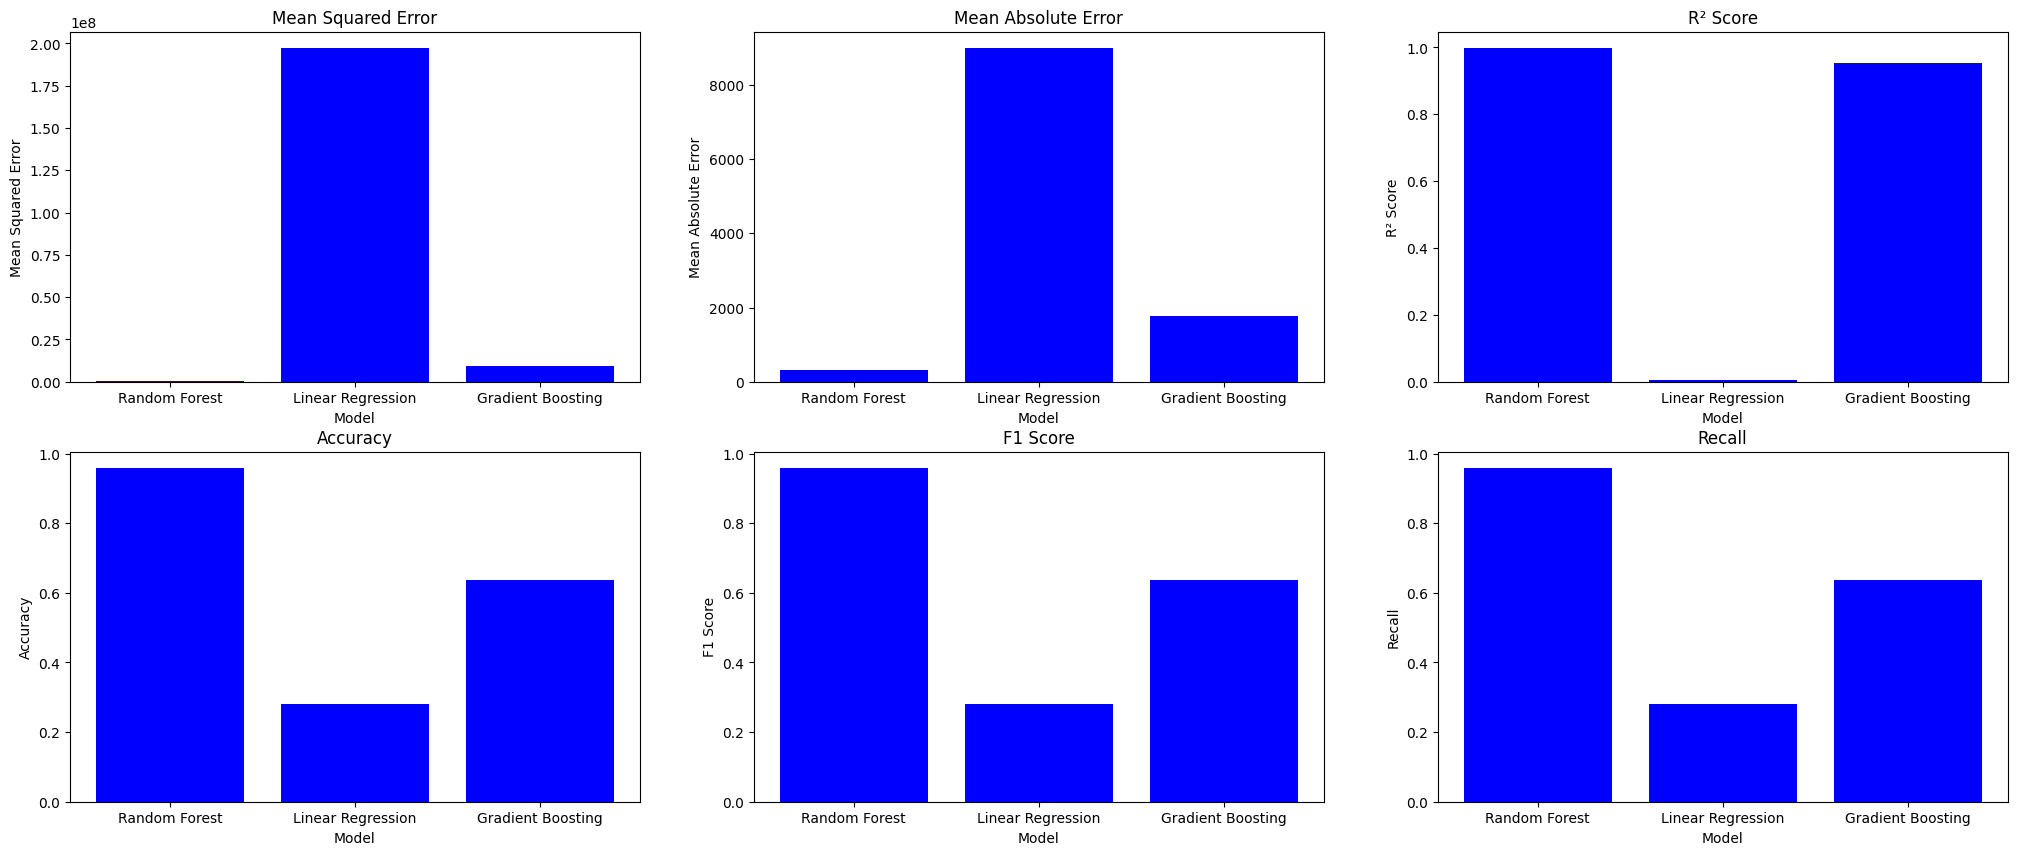

In [262]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/housing_data.csv')

# Encode categorical variables
le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

# Define features and target
features = ['year', 'region']
target_dwelling = 'total_dwelling'

# Split the data into features and target
X = data[features]
y = data[target_dwelling]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
gb_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X, y)
lr_model.fit(X, y)
gb_model.fit(X, y)

# Create a function to evaluate each model
def evaluate_models(models, X, y):
    # Dictionary to store evaluation metrics
    metrics = {
        'Model': [],
        'Mean Squared Error': [],
        'Mean Absolute Error': [],
        'R² Score': [],
        'Accuracy': [],
        'F1 Score': [],
        'Recall': []
    }
    
    for model_name, model in models.items():
        # Predict on the data
        predictions = model.predict(X)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y, predictions)
        mae = mean_absolute_error(y, predictions)
        r2 = r2_score(y, predictions)
        
        # For classification-like metrics, discretize the target and predictions into bins
        y_binned = pd.qcut(y, q=4, labels=False)
        pred_binned = pd.qcut(predictions, q=4, labels=False)
        
        accuracy = accuracy_score(y_binned, pred_binned)
        f1 = f1_score(y_binned, pred_binned, average='weighted')
        recall = recall_score(y_binned, pred_binned, average='weighted')
        
        # Store metrics
        metrics['Model'].append(model_name)
        metrics['Mean Squared Error'].append(mse)
        metrics['Mean Absolute Error'].append(mae)
        metrics['R² Score'].append(r2)
        metrics['Accuracy'].append(accuracy)
        metrics['F1 Score'].append(f1)
        metrics['Recall'].append(recall)
    
    # Convert metrics dictionary to a DataFrame
    metrics_df = pd.DataFrame(metrics)
    
    return metrics_df

# Define the models dictionary
models = {
    'Random Forest': rf_model,
    'Linear Regression': lr_model,
    'Gradient Boosting': gb_model
}

# Evaluate the models
evaluation_metrics = evaluate_models(models, X, y)

# Print the evaluation metrics
print("Evaluation Metrics for Models:")
print(evaluation_metrics)

# Plot the evaluation metrics for visual comparison
fig, ax = plt.subplots(2, 3, figsize=(25, 10))
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R² Score', 'Accuracy', 'F1 Score', 'Recall']

for i, metric in enumerate(metrics):
    ax[i//3, i%3].bar(evaluation_metrics['Model'], evaluation_metrics[metric], color='blue')
    ax[i//3, i%3].set_title(metric)
    ax[i//3, i%3].set_ylabel(metric)
    ax[i//3, i%3].set_xlabel('Model')

plt.show()


In [247]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

# Load your dataset
data = pd.read_csv('data/housing_data.csv')  # Update the file path as needed

# Encode categorical variables
le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

# Define features and target
features = ['year', 'region']  # Feature set includes 'year' and 'region'
target_dwelling = 'total_dwelling'  # Predicting total dwelling

# Train Random Forest model for total dwelling prediction
rf_model_dwelling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_dwelling.fit(data[features], data[target_dwelling])

def predict_dwelling(region, start_year, end_year):
    region_id = le_region.transform([region])[0]
    
    # Prepare input data for prediction
    years = np.arange(start_year, end_year + 1)
    input_data = [[year, region_id] for year in years]
    
    # Predict total dwelling for each year with added variability
    predicted_dwelling = rf_model_dwelling.predict(input_data)
    
    # Introduce variability by adding random noise to predictions
    variability_factor = 0.05  # 5% variability
    variability = np.random.uniform(-variability_factor, variability_factor, size=len(predicted_dwelling))
    predicted_dwelling_with_variability = predicted_dwelling * (1 + variability)
    
    # Create a DataFrame for predicted values
    predicted_df = pd.DataFrame({
        'Year': years,
        'Predicted Total Dwelling': predicted_dwelling_with_variability
    })
    
    return predicted_df

def plot_dwelling_overview(predicted_df, region):
    fig = px.line(predicted_df, x='Year', y='Predicted Total Dwelling', title=f'Predicted Total Dwelling in Region {region}')
    
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Predicted Total Dwelling',
        template='plotly_white'
    )
    
    fig.show()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        region = region_dropdown.value
        start_year = year_slider.value
        end_year = start_year + forecast_years_slider.value
        
        try:
            predicted_df = predict_dwelling(region, start_year, end_year)
            
            # Display predicted values
            print(f"Predicted Total Dwelling in Region {region} from {start_year} to {end_year}:")
            display(predicted_df)
            
            # Plot detailed overview of predicted total dwelling
            plot_dwelling_overview(predicted_df, region)
        
        except ValueError as e:
            print(str(e))

# Dropdown widget for selecting region
region_dropdown = widgets.Dropdown(
    options=list(le_region.inverse_transform(data['region'].unique())),
    description='Select Region:'
)

# Slider widget for selecting start year
year_slider = widgets.IntSlider(
    min=data['year'].min(),
    max=data['year'].max(),
    step=1,
    description='Start Year:'
)

# Slider widget for selecting number of forecast years
forecast_years_slider = widgets.IntSlider(
    min=1,
    max=10,
    step=1,
    description='Forecast Years:'
)

# Button widget for triggering prediction
predict_button = widgets.Button(description='Predict')

# Output widget to display predictions and plot
output = widgets.Output()

# Handle button click event
predict_button.on_click(on_predict_button_clicked)

# Display widgets and output
display(region_dropdown, year_slider, forecast_years_slider, predict_button, output)


Dropdown(description='Select Region:', options=('manitoba', 'vancouver', 'winnipeg', 'calgary', 'prince_edward…

IntSlider(value=1990, description='Start Year:', max=2016, min=1990)

IntSlider(value=1, description='Forecast Years:', max=10, min=1)

Button(description='Predict', style=ButtonStyle())

Output()

In [266]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px
from plotly import graph_objects as go
from datetime import datetime, timedelta

# Load the dataset
data = pd.read_csv('data/Interest and mortgage rates 1951-2022.csv')

# Convert Date to datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Extract year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Define features and targets
features = ['Year', 'Month']
target_mortgage = 'Mortgage Rate'
target_interest = 'Interest Rate'

# Split the data into features and targets
X = data[features]
y_mortgage = data[target_mortgage]
y_interest = data[target_interest]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define models
rf_model_mortgage = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model_mortgage = LinearRegression()
gb_model_mortgage = GradientBoostingRegressor(random_state=42)

rf_model_interest = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model_interest = LinearRegression()
gb_model_interest = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model_mortgage.fit(X, y_mortgage)
lr_model_mortgage.fit(X, y_mortgage)
gb_model_mortgage.fit(X, y_mortgage)

rf_model_interest.fit(X, y_interest)
lr_model_interest.fit(X, y_interest)
gb_model_interest.fit(X, y_interest)

# Create a function to evaluate each model
def evaluate_models(models, X, y):
    # Dictionary to store evaluation metrics
    metrics = {
        'Model': [],
        'Mean Squared Error': [],
        'Mean Absolute Error': [],
        'R² Score': []
    }
    
    for model_name, model in models.items():
        # Predict on the data
        predictions = model.predict(X)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y, predictions)
        mae = mean_absolute_error(y, predictions)
        r2 = r2_score(y, predictions)
        
        # Store metrics
        metrics['Model'].append(model_name)
        metrics['Mean Squared Error'].append(mse)
        metrics['Mean Absolute Error'].append(mae)
        metrics['R² Score'].append(r2)
    
    # Convert metrics dictionary to a DataFrame
    metrics_df = pd.DataFrame(metrics)
    
    return metrics_df

# Define the models dictionary for mortgage rate
models_mortgage = {
    'Random Forest': rf_model_mortgage,
    'Linear Regression': lr_model_mortgage,
    'Gradient Boosting': gb_model_mortgage
}

# Define the models dictionary for interest rate
models_interest = {
    'Random Forest': rf_model_interest,
    'Linear Regression': lr_model_interest,
    'Gradient Boosting': gb_model_interest
}

# Evaluate the models for mortgage rate
evaluation_metrics_mortgage = evaluate_models(models_mortgage, X, y_mortgage)

# Evaluate the models for interest rate
evaluation_metrics_interest = evaluate_models(models_interest, X, y_interest)

# Print the evaluation metrics for mortgage rate
print("Evaluation Metrics for Mortgage Rate Models:")
print(evaluation_metrics_mortgage)

# Print the evaluation metrics for interest rate
print("Evaluation Metrics for Interest Rate Models:")
print(evaluation_metrics_interest)

# Predict the next 10 periods
def predict_next_periods(models, start_date, num_periods):
    predictions = {}
    
    # Generate future periods
    future_dates = [start_date + timedelta(days=i * 30) for i in range(num_periods)]
    future_years = [date.year for date in future_dates]
    future_months = [date.month for date in future_dates]
    
    # Standardize future features
    future_features = np.array(list(zip(future_years, future_months)))
    future_features = scaler.transform(future_features)
    
    # Predict for each model
    for model_name, model in models.items():
        predictions[model_name] = model.predict(future_features)
    
    return future_dates, predictions

# Predict the next 10 periods for mortgage rate
future_dates, predictions_mortgage = predict_next_periods(models_mortgage, data['Date'].max(), 10)

# Predict the next 10 periods for interest rate
future_dates, predictions_interest = predict_next_periods(models_interest, data['Date'].max(), 10)

# Plot predictions for mortgage rate
fig_mortgage = go.Figure()
for model_name, prediction in predictions_mortgage.items():
    fig_mortgage.add_trace(go.Scatter(x=future_dates, y=prediction, mode='lines', name=model_name))
fig_mortgage.update_layout(title='Predictions for Mortgage Rate',
                           xaxis_title='Date',
                           yaxis_title='Mortgage Rate')
fig_mortgage.show()

# Plot predictions for interest rate
fig_interest = go.Figure()
for model_name, prediction in predictions_interest.items():
    fig_interest.add_trace(go.Scatter(x=future_dates, y=prediction, mode='lines', name=model_name))
fig_interest.update_layout(title='Predictions for Interest Rate',
                           xaxis_title='Date',
                           yaxis_title='Interest Rate')
fig_interest.show()


Evaluation Metrics for Mortgage Rate Models:
               Model  Mean Squared Error  Mean Absolute Error  R² Score
0      Random Forest            0.014278             0.059998  0.998693
1  Linear Regression            9.773989             2.512553  0.105056
2  Gradient Boosting            0.182422             0.278597  0.983297
Evaluation Metrics for Interest Rate Models:
               Model  Mean Squared Error  Mean Absolute Error  R² Score
0      Random Forest            0.026906             0.082083  0.998424
1  Linear Regression           16.896485             3.265106  0.010470
2  Gradient Boosting            0.397976             0.423698  0.976693


c:\Users\jahir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\jahir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

